In [1]:
import acquire
import prepare
import explore
import scipy.stats as stats

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Project Planning and Goals:

- Create README.md with data dictionary, project and business goals.
- Acquire my data function to automate data acquisition.
- Clean and prepare my data as necessary. Create a function to automate the process, store it for import.
- Clearly define two hypotheses, set an alpha, run the statistical tests needed, reject or fail to reject the ${H_0}$, and document findings.
- Establish a baseline accuracy model.
- Train three different classification models.
- Evaluate models on train and validate datasets.
- Choose the model with that performs the best and evaluate that single model on the test dataset.
- Create csv file with the customer id, the probability of the customer's churn, and the model's prediction for each observation.
- End with conclusion, takeaways, and next steps.

## Exercutive Summary:
- I created three different models between LogisticRegression, DecisionTree, and RandomForest, my RandomForest model performed the best on customer churn with an 81% overall accuracy.
- This model outperformed my baseline score of 73%.
- Further statistical testing confirmed associations of churn with paperless billing, monthly charges, and having a partner.


## ACQUIRE DATA

In [2]:
df = acquire.get_new_telco_churn_data()

In [3]:
# take a look at our dataframe
df.sample(5)

,payment_type_id,payment_type,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,...,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,internet_service_type_id,internet_service_type,contract_type_id,contract_type
5857,3,Bank transfer (automatic),7996-BPXHY,Female,0,Yes,Yes,13,Yes,Yes,...,3,Yes,3,25.00,332.5,No,3,None,3,Two year
408,3,Bank transfer (automatic),7727-SHVZV,Female,0,No,No,9,Yes,No,...,1,No,3,19.50,150.35,No,3,None,1,Month-to-month
279,2,Mailed check,4946-EDSEW,Female,0,Yes,Yes,11,Yes,No,...,1,Yes,2,19.25,180.3,Yes,3,None,1,Month-to-month
5144,2,Mailed check,6478-HRRCZ,Male,0,Yes,No,32,Yes,No,...,2,No,2,70.50,2201.75,No,1,DSL,2,One year
5403,3,Bank transfer (automatic),0902-XKXPN,Male,0,Yes,Yes,69,Yes,No,...,3,No,3,20.20,1376.5,No,3,None,3,Two year


In [4]:
print('My dataframe has', df.shape[0], 'rows and', df.shape[1], 'columns')

My dataframe has 7043 rows and 27 columns


In [5]:
# let's take a look at our columns and data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   payment_type              7043 non-null   object 
 2   customer_id               7043 non-null   object 
 3   gender                    7043 non-null   object 
 4   senior_citizen            7043 non-null   int64  
 5   partner                   7043 non-null   object 
 6   dependents                7043 non-null   object 
 7   tenure                    7043 non-null   int64  
 8   phone_service             7043 non-null   object 
 9   multiple_lines            7043 non-null   object 
 10  internet_service_type_id  7043 non-null   int64  
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

## Acquire takeaways:
- The data is imported from my sql query.
- The original dataframe has 7043 rows and 27 columns.
- There are duplicate columns from the query.
- Many columns we need to convert to flag columns for exploration and modeling.

## PREPARE

In [6]:
# Let's take a quick look at my values for specific columns
churned_df = df[df['churn']=='Yes']
explore.value_counts(churned_df)

payment_type
Electronic check             1071
Mailed check                  308
Bank transfer (automatic)     258
Credit card (automatic)       232
Name: payment_type, dtype: int64
-------------
gender
Female    939
Male      930
Name: gender, dtype: int64
-------------
senior_citizen
0    1393
1     476
Name: senior_citizen, dtype: int64
-------------
partner
No     1200
Yes     669
Name: partner, dtype: int64
-------------
dependents
No     1543
Yes     326
Name: dependents, dtype: int64
-------------
phone_service
Yes    1699
No      170
Name: phone_service, dtype: int64
-------------
multiple_lines
Yes                 850
No                  849
No phone service    170
Name: multiple_lines, dtype: int64
-------------
online_security
No                     1461
Yes                     295
No internet service     113
Name: online_security, dtype: int64
-------------
online_backup
No                     1233
Yes                     523
No internet service     113
Name: online_backup,

- Right off the bat I can see which columns don't appear to have an obvious association to churn:
 - streaming_movies
 - streaming_tv
 - multiple_lines
 - gender
 -------------
- This helps me summarize which features may be more important for my dataframe.

In [7]:
# clean my data
df = prepare.prep_telco_data(df)

In [8]:
df.sample(3).T

,500,3264,5477
payment_type,Mailed check,Credit card (automatic),Bank transfer (automatic)
customer_id,9441-QHEVC,4959-JOSRX,2007-QVGAW
senior_citizen,0,0,0
partner,0,1,1
dependents,0,0,1
tenure_in_months,1,2,68
phone_service,1,1,1
online_security,0,0,0
online_backup,0,0,0
device_protection,0,0,0


In [9]:
df.dtypes

payment_type              object
customer_id               object
senior_citizen             int64
partner                    int64
dependents                 int64
tenure_in_months           int64
phone_service              int64
online_security            int64
online_backup              int64
device_protection          int64
tech_support               int64
paperless_billing          int64
monthly_charges          float64
total_charges            float64
churn                      int64
internet_service_type     object
contract_type             object
dtype: object

In [10]:
print('My dataframe now has', df.shape[0], 'rows and', df.shape[1], 'columns')

My dataframe now has 7032 rows and 17 columns


In [11]:
# now I will split my data
train, validate, test = prepare.telco_split(df)

In [12]:
# new shape of splitted data
train.shape, validate.shape, test.shape

((3937, 17), (1688, 17), (1407, 17))

In [13]:
train.head().T

,5399,2876,659,5843,2229
payment_type,Mailed check,Electronic check,Mailed check,Bank transfer (automatic),Bank transfer (automatic)
customer_id,0831-JNISG,1963-SVUCV,0611-DFXKO,7696-CFTAT,7916-VCCPB
senior_citizen,0,0,0,0,0
partner,1,0,1,1,1
dependents,1,0,0,1,1
tenure_in_months,71,1,20,37,16
phone_service,1,1,1,1,1
online_security,0,0,0,0,0
online_backup,0,0,0,0,1
device_protection,0,0,0,0,0


## Prepare Takeaways:
 - I changed my string columns to flag columns
 - I dropped any nulls (from total charges)
 - I dropped unnecessary columns
 - I split my data for exploration and model
 - I will later create dummies for my-non binary columns
 ---------------

## EXPLORE

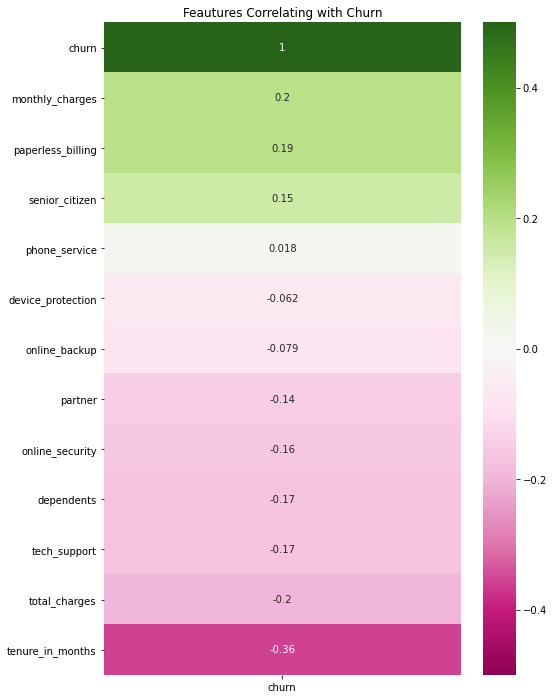

In [14]:
# Take a look at a heatmap of correlation to churn
plt.figure(figsize=(8,12))
churn_heatmap = sns.heatmap(train.corr()[['churn']].sort_values(by='churn', ascending=False), cmap='PiYG', vmin=-.5, vmax=.5, annot=True)
churn_heatmap.set_title('Feautures Correlating with Churn')
plt.show()

- We can see from our heatmap that there is not much correlation at all to:
    - phone_service
    - device_protection
    - online_backup

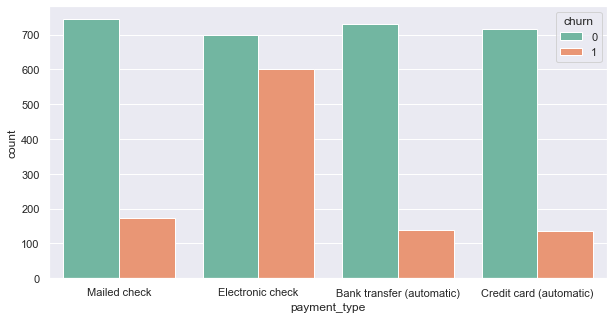

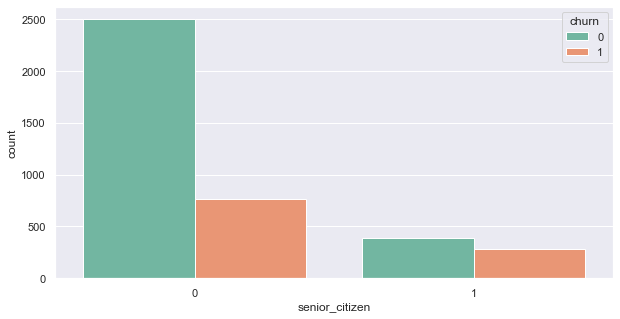

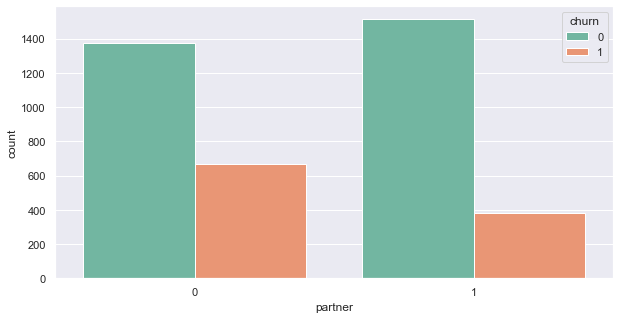

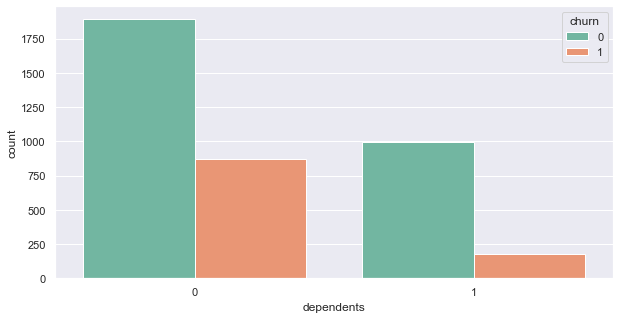

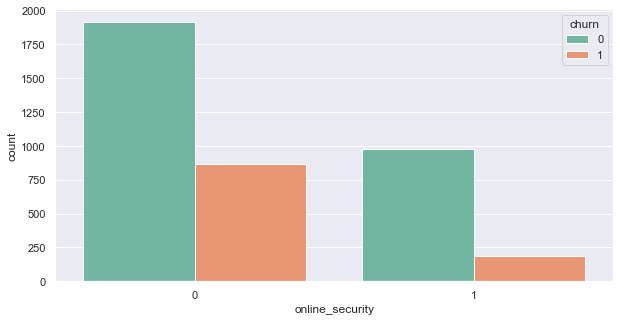

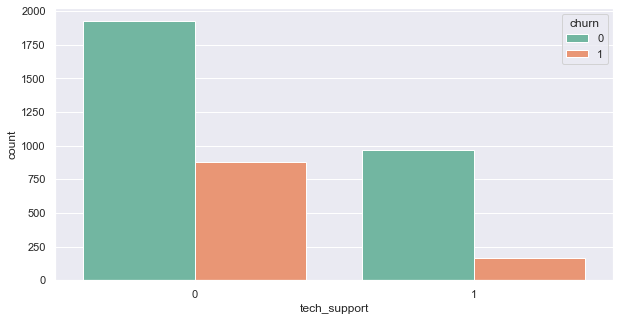

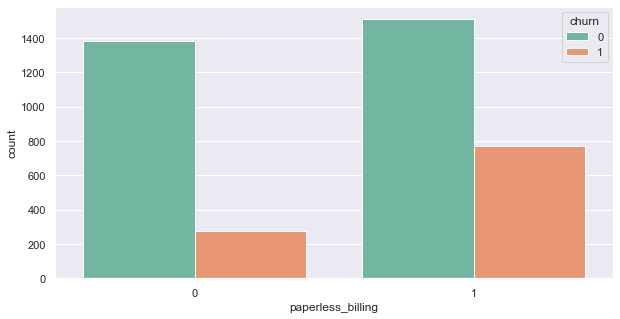

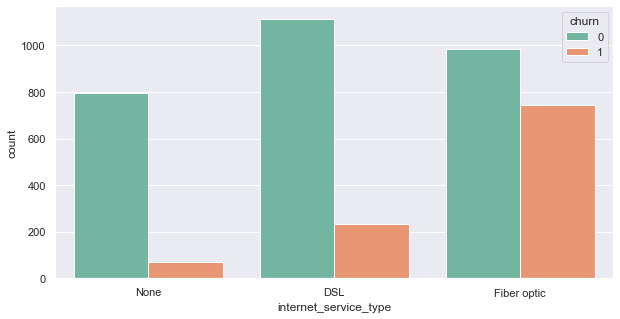

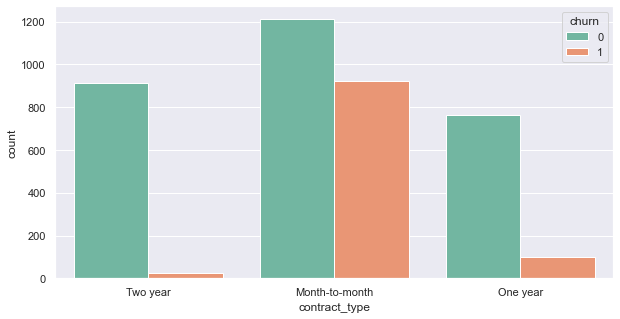

In [15]:
# Let's dive deeper into some of our features to analyze further obvious causes of churn

columns = ['payment_type', 'senior_citizen', 'partner', 'dependents', 'online_security',
          'tech_support', 'paperless_billing', 'internet_service_type', 'contract_type']

sns.set_theme(style="darkgrid")
for i in train[columns]:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=train, x=i, hue='churn', palette="Set2")
    plt.show()

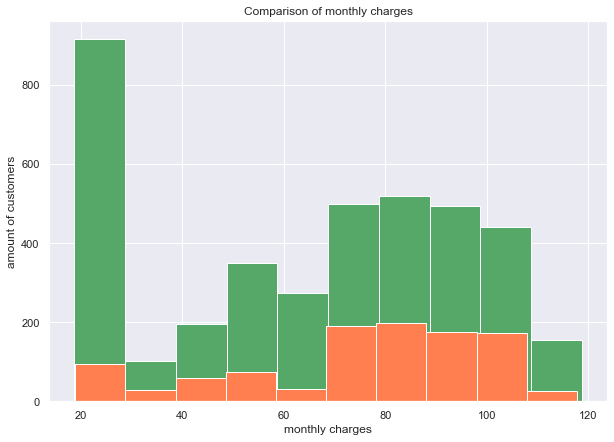

In [16]:
# Another look at comparison of monthly charges
plt.figure(figsize=(10,7))
train.monthly_charges.hist(color='g')
train[train['churn']==1].monthly_charges.hist(color='coral')
plt.xlabel('monthly charges')
plt.ylabel('amount of customers')
plt.title('Comparison of monthly charges')
plt.show()

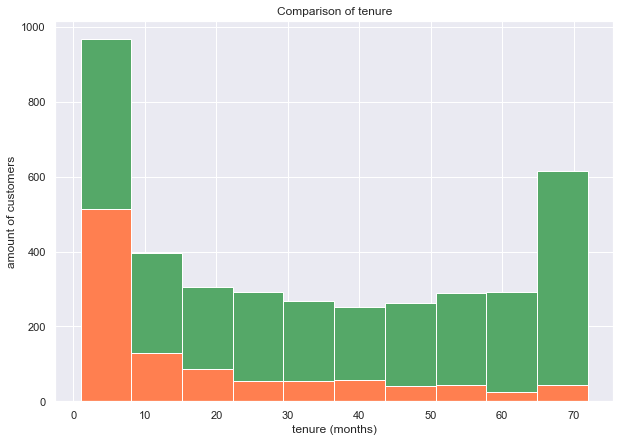

In [17]:
# A further look at comparison of tenure
plt.figure(figsize=(10,7))
train.tenure_in_months.hist(color='g')
train[train['churn']==1].tenure_in_months.hist(color='coral')
plt.xlabel('tenure (months)')
plt.ylabel('amount of customers')
plt.title('Comparison of tenure')
plt.show()

-------
Let's further analyze associations with paperless billing, partners, and monthly charges.


Conduct a $chi^2$ test for independence between paperless billing and churn\
${H_0}$ : There is no association with paperless billing and customer churn\
${H_a}$ : Paperless billing does have an association to churn

In [19]:
# we set our alpha up for statistical testing, confidence level at 95%
alpha = 0.05

observed = pd.crosstab(train.churn, train.paperless_billing)

# conduct our chi2 test
chi2, p, degf, expected = stats.chi2_contingency(observed)


print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4}')

Observed

[[1382 1507]
 [ 276  772]]
---
Expected

[[1216 1672]
 [ 441  606]]
---

chi^2 = 144.9512
p     = 2.201e-33


In [20]:
if p < alpha:
    print('We reject the null hypothesis')
    print('The two samples are associated')
else:
    print('We fail to reject the null hypothesis')

We reject the null hypothesis
The two samples are associated


---------
Next, conduct another chi2 test for independence between partner and churn.\
${H_0}$ : Having a partner is independent from customer churn\
${H_a}$ : Having a partner does have an association to churn

In [21]:
# set our alpha
alpha = 0.05

observed = pd.crosstab(train.churn, train.partner)

# conduct a chi2 test
chi2, p, degf, expected = stats.chi2_contingency(observed)

# take a look at our results
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:}')

Observed

[[1376 1513]
 [ 666  382]]
---
Expected

[[1498 1390]
 [ 543  504]]
---

chi^2 = 77.4423
p     = 1.3665799090892278e-18


In [22]:
if p < alpha:
    print('We reject the null hypothesis')
    print('The two samples are associated')
else:
    print('We fail to reject the null hypothesis')

We reject the null hypothesis
The two samples are associated


------------------------------------------------------------------------------
- Lastly, take a look at mean of monthly charges of churned customers versus overall customers.\
- We will conduct a two sample, one tailed ttest.\
${H_0}$: Mean of monthly charges of churned customers = Mean of monthly charges of all customers.\
${H_a}$: Mean of monthly charges of churned customers > Mean of monthly charges of all customers.

In [23]:
# calculate t and p statistic
churn_sample = train[train.churn == 1].monthly_charges
overall_mean = train.monthly_charges.mean()

t, p = stats.ttest_1samp(churn_sample, overall_mean)

t, p/2, alpha

(12.897478777164558, 9.909789308393289e-36, 0.05)

In [24]:
if (p/2 < alpha) & (t > 0):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


## Explore Takeaways:
- The histplots tell confirm correlation with:
 - payment_type
 - senior_citizen
 - contract_type
 - internet_service_type
 - dependents

- Our stats tests proved:
    - Paperless billing is associated
    - Monthly charges is associated
    - Having a partner is also associated

## MODEL & EVALUATE

In [25]:
# keep my most valuable features on my split data and drop the rest
features = ['payment_type', 'senior_citizen', 'contract_type',
           'internet_service_type', 'dependents', 'paperless_billing',
           'monthly_charges', 'partner', 'churn']

train = train[features]
validate = validate[features]
test = test[features]

In [26]:
train = prepare.create_dummies(train)
validate = prepare.create_dummies(validate)
test = prepare.create_dummies(test)

In [27]:
train.shape, validate.shape, test.shape

((3937, 13), (1688, 13), (1407, 13))

In [28]:
train.sample(3).T

,2118,3916,6904
senior_citizen,0.0,0.0,0.00
dependents,0.0,0.0,1.00
paperless_billing,1.0,0.0,0.00
monthly_charges,70.3,21.1,64.45
partner,1.0,0.0,1.00
churn,1.0,0.0,0.00
Credit card (automatic),0.0,0.0,1.00
Electronic check,1.0,0.0,0.00
Mailed check,0.0,1.0,0.00
DSL,0.0,0.0,1.00


### Baseline Model

In [29]:
# create a baseline
train.churn.value_counts()

0    2889
1    1048
Name: churn, dtype: int64

In [30]:
# the most common entry is 0 for not churned, so that is my baseline
train['baseline'] = 0
train.sample().T

,3852
senior_citizen,0.0
dependents,0.0
paperless_billing,1.0
monthly_charges,65.6
partner,0.0
churn,0.0
Credit card (automatic),0.0
Electronic check,0.0
Mailed check,0.0
DSL,1.0


In [31]:
# create a classification report for our baseline model
print(classification_report(train.churn, train.baseline))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85      2889
           1       0.00      0.00      0.00      1048

    accuracy                           0.73      3937
   macro avg       0.37      0.50      0.42      3937
weighted avg       0.54      0.73      0.62      3937



#### - Accuracy for my baseline is 73%

In [32]:
# let's drop baseline for now since we don't need it anymore
train.drop(columns = 'baseline', inplace=True)

In [33]:
# verify my features are the correct data types for my model
train.dtypes

senior_citizen               int64
dependents                   int64
paperless_billing            int64
monthly_charges            float64
partner                      int64
churn                        int64
Credit card (automatic)      uint8
Electronic check             uint8
Mailed check                 uint8
DSL                          uint8
Fiber optic                  uint8
One year                     uint8
Two year                     uint8
dtype: object

In [34]:
# assign my x features and y target for each split dataframe
x_train = train.drop(columns = 'churn')
y_train = train.churn

x_validate = validate.drop(columns = 'churn')
y_validate = validate.churn

x_test = test.drop(columns = 'churn')
y_test = test.churn

## Model 1 (Logistic Regression)

In [35]:
logit1 = LogisticRegression(C=1, class_weight={0:1, 1:99}, random_state=123, intercept_scaling=1, solver='lbfgs')

print('Model 3 is a', logit1)
print('----------')

logit1.fit(x_train, y_train)

y_pred = logit1.predict(x_train)

tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()
print("True Positives", tp)
print("False Positives", fp)
print("False Negatives", fn)
print("True Negatives", tn)

print("-------------")

accuracy = (tp + tn) / (tp + tn + fp + fn)
recall = tp / (tp + fn)
precision = tp / (tp + fp)

print("Accuracy is", accuracy)
print("Recall is", recall)
print("Precision is", precision)

print("-------------")


print(classification_report(y_train, y_pred))

print("-------------")


print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit1.score(x_train, y_train)))
print('Accuracy of Logistic Regression classifier on validate set: {:.2f}'
     .format(logit1.score(x_validate, y_validate)))

Model 3 is a LogisticRegression(C=1, class_weight={0: 1, 1: 99}, random_state=123)
----------
True Positives 1047
False Positives 2564
False Negatives 1
True Negatives 325
-------------
Accuracy is 0.34848869697739393
Recall is 0.9990458015267175
Precision is 0.2899473829963999
-------------
              precision    recall  f1-score   support

           0       1.00      0.11      0.20      2889
           1       0.29      1.00      0.45      1048

    accuracy                           0.35      3937
   macro avg       0.64      0.56      0.33      3937
weighted avg       0.81      0.35      0.27      3937

-------------
Accuracy of Logistic Regression classifier on training set: 0.35
Accuracy of Logistic Regression classifier on validate set: 0.35


## Model 2 (Decision Tree)

In [36]:
dt1 = DecisionTreeClassifier(max_depth=4, random_state=123)
print('Model 2 is a', dt1)
print('----------')
# fit my model
dt1 = dt1.fit(x_train, y_train)

# model's prediction for each observation
y_pred = dt1.predict(x_train)

tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()
print("True Positives", tp)
print("False Positives", fp)
print("False Negatives", fn)
print("True Negatives", tn)

print("-------------")

accuracy = (tp + tn) / (tp + tn + fp + fn)
recall = tp / (tp + fn)
precision = tp / (tp + fp)

print("Accuracy is", accuracy)
print("Recall is", recall)
print("Precision is", precision)

print("-------------")


print(classification_report(y_train, y_pred))

print("-------------")

print('Accuracy of Decision Tree classifier Model 2 on training set: {:.2f}'
      .format(dt1.score(x_train, y_train)))
print('Accuracy of Decision Tree classifier Model 2 on validate set: {:.2f}'
      .format(dt1.score(x_validate, y_validate)))

Model 2 is a DecisionTreeClassifier(max_depth=4, random_state=123)
----------
True Positives 448
False Positives 280
False Negatives 600
True Negatives 2609
-------------
Accuracy is 0.7764795529591059
Recall is 0.42748091603053434
Precision is 0.6153846153846154
-------------
              precision    recall  f1-score   support

           0       0.81      0.90      0.86      2889
           1       0.62      0.43      0.50      1048

    accuracy                           0.78      3937
   macro avg       0.71      0.67      0.68      3937
weighted avg       0.76      0.78      0.76      3937

-------------
Accuracy of Decision Tree classifier Model 2 on training set: 0.78
Accuracy of Decision Tree classifier Model 2 on validate set: 0.78


## Model 3 (Random Forest)

In [37]:
rf1 = RandomForestClassifier(bootstrap=True,
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=2,
                            max_depth=8,
                            random_state=123                           
                           )
print('Model 3 is a', rf1)
print("-------------")

rf1.fit(x_train, y_train)

y_pred = rf1.predict(x_train)

tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()
print("True Positives", tp)
print("False Positives", fp)
print("False Negatives", fn)
print("True Negatives", tn)

print("-------------")

accuracy = (tp + tn) / (tp + tn + fp + fn)
recall = tp / (tp + fn)
precision = tp / (tp + fp)

print("Accuracy is", accuracy)
print("Recall is", recall)
print("Precision is", precision)

print("-------------")

print(classification_report(y_train, y_pred))
y_pred_proba = logit1.predict_proba(x_train)

print("-------------")

print('Accuracy of random forest classifier Model 3 on training set: {:.2f}'
     .format(rf1.score(x_train, y_train)))
print('Accuracy of random forest classifier Model 3 on validate set: {:.2f}'
     .format(rf1.score(x_validate, y_validate)))

Model 3 is a RandomForestClassifier(max_depth=8, min_samples_leaf=2, random_state=123)
-------------
True Positives 559
False Positives 261
False Negatives 489
True Negatives 2628
-------------
Accuracy is 0.809499618999238
Recall is 0.5333969465648855
Precision is 0.6817073170731708
-------------
              precision    recall  f1-score   support

           0       0.84      0.91      0.88      2889
           1       0.68      0.53      0.60      1048

    accuracy                           0.81      3937
   macro avg       0.76      0.72      0.74      3937
weighted avg       0.80      0.81      0.80      3937

-------------
Accuracy of random forest classifier Model 3 on training set: 0.81
Accuracy of random forest classifier Model 3 on validate set: 0.79


### Model 3 Random Forest is best model with 81% overall accuracy.

In [38]:
# test our chosen model
print('Accuracy of Random Forest Model 3 classifier on test set: {:.2f}'
     .format(rf1.score(x_test, y_test)))

Accuracy of Random Forest Model 3 classifier on test set: 0.75


# Modeling Takeaways:
- Neither model was overfit.
- Logistic Regression gave us the worst accuracy overall.
- Decision Tree was a close second choice.
- Random Forest Model 3 is best performed model.
- Model 3 gaves us a 75% accuracy on the test set.

### We're in the money!

#### Create a CSV
 - Create a CSV file with probability of churn, prediction of churn (1=churn, 0=not_churn)

In [39]:
# create a csv

# combine my train, validate, and test dataframe
df_telco = pd.concat([train, validate, test], axis=0)

# assign a variable to my customer_id column to concatenate later
customer_ids = df['customer_id']

# drop my churn column for my model
df_telco_data = df_telco.drop(columns=['churn'])

# create a dataframe out of my predictions for each customer
prediction_of_churn = pd.DataFrame({'churn_prediction' : rf1.predict(df_telco_data)})

# create a dataframe out of my predictions for each customer's probability of churn
churn_probability = pd.DataFrame({'churn_probability': rf1.predict_proba(df_telco_data)[:,1]})

# combine my dataframes
data = [customer_ids, churn_probability, prediction_of_churn]

# concatenate my dataframes
customer_churn = pd.concat(data, axis=1)

In [40]:
customer_churn.head()

,customer_id,churn_probability,churn_prediction
0,0030-FNXPP,0.007426,0.0
1,0031-PVLZI,0.448979,0.0
2,0098-BOWSO,0.450628,0.0
3,0107-WESLM,0.007376,0.0
4,0114-RSRRW,0.290747,0.0


In [ ]:
# export to csv file
customer_churn.to_csv('predictions.csv')

## Summary:

- I found that Model 3, Random Forest performed the best on all three of my data sets.
- Some of the most associated attributes are payment type, dependents and contract type.

What can we do now?
 - Offer incentives targeting churned customers with common features.
 - Improve model performance by focusing on specific features such as contract type.
 - Offer discounted services the first 6 months to improve tenure.
 - Offer exit surveys to departing customers to improve or add more features to increase model performance.